# Characterizing data distribution

#### We want to represent the dataset in a human-friendly format to get a good impression of it. This is a kind of dataset "identity card".

- Data format : autoML

In [1]:
data_dir = '../../data'

datasets = {'iris': (data_dir + '/iris', 'iris'),
            'iris_1': (data_dir + '/iris_1', 'iris'),
            'iris_2': (data_dir + '/iris_2', 'iris'),
            'mimic': (data_dir + '/mimic', 'mimic'),
            'mushrooms': (data_dir + '/mushrooms', 'mushrooms'),
            'chems': (data_dir + '/chems', 'chems'),
            'credit': (data_dir + '/credit_data', 'credit'),
            'squares': (data_dir + '/squares', 'squares'),
            'squares_2': (data_dir + '/squares_2', 'squares'),
            'adult': (data_dir + '/adult', 'adult')}

input_dir, basename = datasets['mushrooms']

## Characterization

### Visualization
- Scatter plot matrix
- Classes distribution
- Hierarchical clustering with heatmap matrix
- Hierarchical clustering with correlation matrix
- Principal components analysis (PCA)
- Linear discriminant analysis (LDA)
- T-distributed stochastic neighbor embedding (t-SNE algorithm)

### Meta features

- **Simple features, Simple Measurements or General Data Characteristic** are directly and easily accessible properties of the dataset wich need almost no computations such as number of classes or number of attributes.
    
    - Number of records: $n$
    - Number of attributes: $m$
    -  Number of classes: $q$
    -  Ratio of symbolic attributes: $\frac{m_{symb}}{m}$
    -  DatasetRatio $=\frac{NumberOfFeatures}{NumberOfInstances}$  
    -  Default error rate: $1 - Acc_{def}$ where $Acc_{def}$ is the probability of the largest class or default accuracy.
    -  Standard deviation of the class distribution: $\sigma_{class}$
    -  Relative probability of defective records: $\frac{n_{defTuple}}{n}$ where $n_{defTuple}$ is the number of records with missing values.
    -  Relative probability of missing values: $\frac{h_{missVal}}{n \times m}$ where $h_{missVal}$ is the number of missing values.

<br>   
- **Statistical features** use statistical analysis methods and tests (Engels and Theusinger, 1998; Sohn 1999).
    
    - Kurtosis: Fourth central moment divided by the square of the variance $\frac{E[(x_i-E[x_i])^4]}{[E[(x_i-E[x_i])^4]]^2}$ where $x_i$ is the ith feature. 
    - PCAKurtosis: Transform the dataset X by PCA, then compute the kurtosis
    - SkewnessMin: min over skewness of all features. Skewness measures the symmetry of a distribution. A skewness value > 0 means that there is more weight in the left tail of the distribution

<br> 
- **Discriminant Measurements** compute a discriminant analysis leading to the following measurements:
    
    -  Relative importance if the largest eigenvalue as an indication for the importance of the $1{\text{st}}$ discriminant function
    -  Canonical correlation, which is an indicator for the degree of correlation between the most significant discriminant function and class distribution. There is a strong correlation between the classes and the $1{\text{st}}$ discriminant function if this measurement is close to unity.
    -  Number of discriminant functions
    -  Wilks Lambda describes the significance of the r discriminant functions and is defined as follows:
        
        $$ \Lambda = \Pi^{DiscFct}_{j=1} \frac{1}{1 + \lambda_j} $$
        
        If Wlambda is near zero, in principle this indicates there is a good possibility for making good discriminations.

<br> 
-  **Information-theoric features** typically use entropy measures of the attributes and the class label (Segrera et al., 2008).
    
    -  ClassEntropy $= mean(-\sum_{i=1}^{n}p(Class_i)ln(p(Class_i)))$ where $p(Class_i)$ is the probability of having an instance of Class\_i
    -  Join entropy
    -  Average attribute entropy
    -  Average mutual information
    -  Relevance-measure
    -  Signal Noise Ratio

<br> 
-  **Model-based features** create a model of the data, e.g. a decision tree, and use properties of it, e.g. the width and height of the tree, as features (Peng et al., 2002 used 17 properties of a decision tree).

<br> 
-  **Landmarking features** apply fast computable classifiers, e.g. Naive Bayes or 1-Nearest Neighbor, on the dataset (Pfahringer et al., 2000; Bensusan and Giraud-Carrier, 2000) and use the resulting performance as meta-features. This can be done with several metrics.
    
    <!-- -  Landmark[Some\_Model]: accuracy of [Some\_Model] applied on dataset. -->
    <!-- -  LandmarkDecisionNodeLearner \& LandmarkRandomNodeLearner: Both are decision tree with max\_depth=1. `DecisionNode' considers all features when looking for best split, and `RandomNode' considers only 1 feature, where comes the term `random'. -->

<br> 
-  **Time-based features** are specialized for time predictions. They contain time measures of several computations regarding the dataset, e.g. the time for computing the other meta-features. Meta-features of this group have the benefit that they are able to take the performance of the computer into account. In (Reif et al., 2011) they present nine different time-measures.
    
    -  Training time ?
    -  Testing time ?

<!-- 
A voir : Algorithm Characteristics

ClassProbabilityMin $= min_{i=1 \dots n}(p(Class_i))= min_{i=1 \dots n}(\frac{NumberOfInstances\_Class_i}{TotleNumberOfInstances}) $

NumSymbols: For each categorial feature, compute how many unique values there is ???

Interpretability of the model ? -->

In [2]:
# AutoML
import sys
main_path = '../../'
sys.path.append(main_path + 'code/auto_ml')
sys.path.append(main_path + 'code/processing')
sys.path.append(main_path + 'code/functions')
sys.path.append(main_path + 'code/models')
sys.path.append(main_path + 'data')

%matplotlib inline
%load_ext autoreload
%autoreload 2

from auto_ml import AutoML

### Read data

In [3]:
D = AutoML(input_dir, basename)
#D = AutoML.from_csv(input_dir, basename, 'mushrooms.csv', target=0, seps=[',', ','])

In [4]:
D.show_info()

Name: Mushrooms
Train num: 6500
Is sparse: 0
Usage: No info file
Test num: 1624
Feat num: 22
Time budget: 600
Has categorical: 0
Metric: Auc metric
Feat type: Mixed
Format: Dense
Task: Unknown
Has missing: 0
Target num: 1


In [5]:
data = D.get_data('X', processed=False)
data.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
6226,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
5259,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
108,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
1473,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
8090,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [6]:
data.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,4,9,9,1,4,3,5,9,6,7
top,x,y,n,f,n,f,c,b,b,t,...,s,w,w,p,w,o,p,w,v,d
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


## Preprocessing

### Missing values

For numerical variables:
    - Replace missing values by : 'median', 'mean' or 'remove'
    - Replace +inf and -inf by respectively the maximum and the minimum

For categorical variables:
    - Replace missing values by 'missing'
    
For binary variables:
    - Replace missing values by 'missing'

### Normalization

For numerical variables:
    - Normalization : 'mean' or 'min-max'

For categorical variables:
    - None
    
For binary variables:
    - None

### Encoding 

For numerical variables:
    - None

For categorical variables:
    - Encoding : label, one-hot or likelihood
   
For binary variables:
    - Label encoding

In [7]:
processed_data = D.process_data(normalization='min-max', encoding='label', missing='median')
#processed_data = D.get_data(processed=True)
processed_data.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
6226,5,2,4,1,6,1,0,1,4,0,...,7,7,0,2,1,4,2,3,5,1
5259,5,2,9,1,0,1,0,0,4,0,...,7,7,0,2,1,4,3,2,1,0
108,0,2,8,1,3,1,0,0,5,0,...,7,7,0,2,1,4,3,2,3,0
1473,5,3,8,1,6,1,0,1,5,0,...,7,7,0,2,1,4,2,3,5,1
8090,5,2,3,0,5,1,1,0,4,1,...,7,7,0,2,1,0,3,0,1,0


# Visualization

In [8]:
D.subsets

{'X': array(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
        'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
        'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
        'stalk-surface-below-ring', 'stalk-color-above-ring',
        'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
        'ring-type', 'spore-print-color', 'population', 'habitat'],
       dtype=object),
 'test': array([6226, 5259,  108, ..., 7234, 3885, 6987]),
 'train': array([2750, 4176, 6832, ..., 4540, 4783, 4211]),
 'y': array(['class'], dtype=object)}

** Descriptors **

Skewness mean: nan
Symb ratio: 0.0
Ratio: 0.003384615384615385
Skewness max: nan
Missing proba: 0.0
Class deviation: nan
Skewness min: nan



** Plots **

** Scatter plot matrix **

Too much features to pairplot. Number of features: 22, max features to plot set at: 20


** Correlation matrix **

Correlation matrix of X set


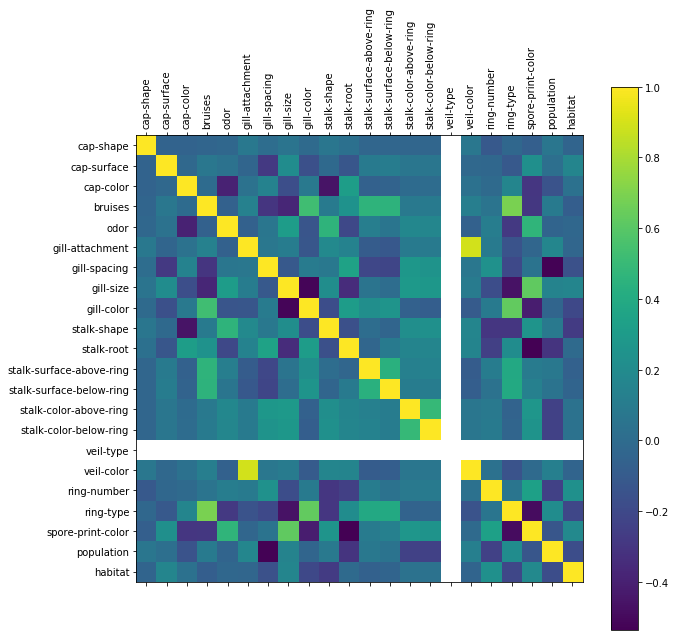

** Hierarchical clustering heatmap **

Hierarchical clustering heatmap of X set

Performing hierarchical clustering using euclidean for columns and euclidean for rows


AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [9]:
D.show_characteristics(sets=['X', 'y_train'], processed=True)

In [ ]:
D.show_pca()
D.show_pca('X_train', 'y_train')

### Help

To know names of AutoML methods and their documentation

In [ ]:
import inspect
inspect.getmembers(AutoML)

In [ ]:
?AutoML.show_descriptors

In [ ]:
?AutoML.process_data